# Table of Content: <a class="anchor" id="table-of-content"></a>
* [1. Problem Background and Motivation](#problem-background)
* [2. Libraries and Custom Functions](#import-packages)
* [3. Data Exploration/Prep](#data-prep)
* [4. Machine Learning Model](#ml-model)
* [5. Deployment of Model](#model-deployment)

# 1. Problem Background and Motivation <a class="anchor" id="problem-background"></a>

<img src='' width="700" />

>- Brief Description of the problem
</br>Pretend you are a data analyst consultant working for the airline industry.  Your goal is to optimize the tuning of a classification model that predicts flights that are likely to be delayed.Drawing conclusions from a wide range of aviation system data and articulating key findings. Conducting quantitative data analysis, including data retrieval, processing, analysis, and visualization of various datasets.
>- Brief mention of key stakeholders - who would be interested in this analysis?
</br>The key stakeholders in this case would be Investors,Customers  and National regulatory bodies which determine air corridors, air traffic control, and the conditions under which airlines are allowed to operate in the country.
<img src="https://miro.medium.com/max/590/1*7pKBn-RXnqvrl-joQgMwZw.jpeg"/>


* [Go to Top](#table-of-content)

# 2. Libraries & Custom Functions <a class="anchor" id="import-packages"></a>
* [Go to Top](#table-of-content)

## 2. Import Package <a class="anchor" id="import-package"></a>
<br>

### Libraries<br>

>**Numpy and Pandas:**<br>
We use it to import the data files which has multi-dimensional arrays and matrices and for data manipulations  <br>

>**SKLearn:**<br>
Sklearn provides multiple machine learning and statistical models to which can best describe the pattern in the data. It also provides metrics toevaluate the performance of the model    <br>
>**Matplotlib, Seaboen, Plotly and Cufflink:**<br>
These libraries are used for data visualization


In [1]:
import pandas as pd    #We use it to import the data files which has multi-dimensional arrays and matrices and for data manipulations
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
import numpy as np

# Graphics
import seaborn as sns  #These libraries are used for data visualization
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# ML
from sklearn.model_selection import train_test_split #Sklearn provides multiple machine learning and statistical models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn import metrics


# Custom function below is used to display performance measures
# Required inputs are the model name and the two test data objects (X,y)
def class_perf_measures(model,X_test,y_test):
    # Create empty lists to store metric values created within loop
    TP = []
    TN = []
    FP = []
    FN = []
    recall = []
    precision = []
    F1 = []
    Accuracy = []
    
    # Create list of probability threshold values to loop over
    threshold = np.arange(0,1.1,0.1).tolist()

    # Start loop
    for i in threshold:

        # Create class assignments given threshold value
        y_test_pred_class = (model.predict_proba(X_test)[:,1] >= i).astype(int)

        # Append lists with metric values
        TP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,1])
        TN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,0])
        FP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,1])
        FN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,0])
        recall.append(metrics.recall_score(y_test, y_test_pred_class).round(3))
        precision.append(metrics.precision_score(y_test, y_test_pred_class).round(3))
        F1.append(metrics.f1_score(y_test, y_test_pred_class).round(2))
        Accuracy.append(metrics.accuracy_score(y_test, y_test_pred_class).round(2))

    # Create dataframe
    result = pd.DataFrame({"threshold":threshold,
                           "TP":TP,
                           "TN":TN,
                           "FP":FP,
                           "FN":FN,
                           "Precision":precision,
                           "Recall":recall,
                           "Accuracy": Accuracy
                          })

    # Let's look at our dataframe
    return result

In [2]:
# Read in data - see what we're dealing with
df = pd.read_csv('FlightDelays_Clean.csv')
#df.tail()

> **Initial Evaluation: Notes on Findings**<br><br>
>**Observations:**<br>
>>**Target:** label (1 if delayed, 0 otherwise<br><br>

>[Go to Data Prep Outline](#data-prep)
---


>[Go to Data Prep Outline](#data-prep)
---

> **Data Partitioning** <a class="anchor" id="data-split"></a>
<br>
>To Do:<br>
><br>predictor variables into new object called 'X'
><br>target variable in new object called 'y'
><br>Partition data into training set and testing set<br>

>

In [3]:
target = ['status_delayed']

X = df.drop(target,axis=1)#putting predictor variables into new object X
y = df[target]#putting target varaible in new object called y

# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=6)

>[Go to Data Prep Outline](#data-prep)
---

> **Data Normalization** <a class="anchor" id="normalization"></a>
<br><br>
>**Note:**<br>
>We do this AFTER splitting the data because we only want to use summary stats<br>
>from the TRAINING data to normalize BOTH TRAIN and TEST data<br>
<br><br>
>OPTIONAL - though it is a good idea to get in the habit of doing this when working with the kNN classifier

In [4]:
# Normalize predictor variables using Z-Scores.
# Use means and standard deviations of features as calculated in the TRAINING DATA
# New values are centered at 0.  Values reflect the number of standard deviations
# each record is above or below the mean.

features_means = X_train.mean()
features_std = X_train.std()

X_train = (X_train - features_means)/features_std
X_test = (X_test - features_means)/features_std

>[Go to Data Prep Outline](#data-prep)
---

# 4. Machine Learning <a class="anchor" id="ml-model"></a>

- [X] [kNN](#first-model)
- [X] [Logistic Model](#second-model)
- [ ] [Performance Evaluation](#third-model)


* [Go to Top](#table-of-content)

> **kNN** <a class="anchor" id="first-model"></a>

>1. Fit numerous kNN models using different values for k. <br>
>2. Choose the "best" value for "k" based on Accuracy

In [5]:
# 1. train a classifier for different values of k
results = []
for k in [1,3,5,7,9,11,13,15,17,19,21]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train.values.ravel())
    
    # Get predicted class
    y_pred_class = knn.predict(X_test)
    
    # Put Accuracy Score in results object
    results.append({'k':k,
                    'accuracy':metrics.accuracy_score(y_test,y_pred_class)
                   }
                  )
# Put results from above into a Pandas Dataframe
results_df = pd.DataFrame(results)
results_df

,k,accuracy
0,1,0.75
1,3,0.77
2,5,0.79
3,7,0.81
4,9,0.82
5,11,0.81
6,13,0.82
7,15,0.82
8,17,0.82
9,19,0.82


>**Decision:**<br>
Based on the results, I will set my number of neighbors (k) to 7 as this is the lowest value that achieves the highest accuracy value<br>



In [6]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train.values.ravel())

# Let's do a quick check to see if we have to worry about problems of overfitting.
# Remember!  Small values for "k" in kNN tend to lead to overfitting.
# Large value for "k" in kNN tend to produce underfit models
y_train_pred_class = knn.predict(X_train)
y_test_pred_class = knn.predict(X_test)

print('Training data Accuracy:', metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print('Testing data Accuracy:', metrics.accuracy_score(y_test,y_test_pred_class).round(2))


Training data Accuracy: 0.83
Testing data Accuracy: 0.81


>**Logistic Model:**<br>
>Let's produce the same table above but this time using a Logistic Model




In [7]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train.values.ravel())

# Let's do a quick check to see if we have to worry about problems of overfitting.
# Remember!  Small values for "k" in kNN tend to lead to overfitting.
# Large value for "k" in kNN tend to produce underfit models
y_train_pred_class = lr_model.predict(X_train)
y_test_pred_class = lr_model.predict(X_test)

print('Training data Accuracy:', metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print('Testing data Accuracy:', metrics.accuracy_score(y_test,y_test_pred_class).round(2))

Training data Accuracy: 0.81
Testing data Accuracy: 0.84


>**Winning Model:**<br>
We need to quickly decide which modeling framework to go forward with<br>
To keep this simple - I'm going to use AUC and will choose the model that gives us the highest value

C:\Users\SHREYASH\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


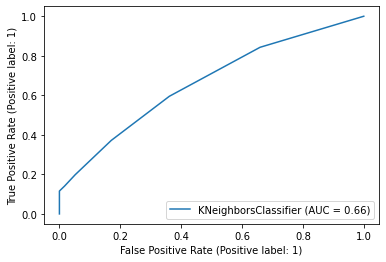

C:\Users\SHREYASH\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


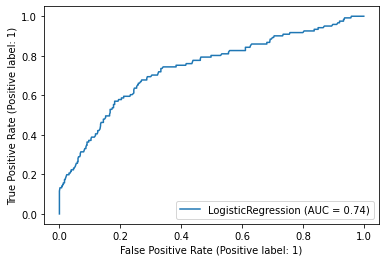

In [8]:
# ROC curve for kNN
metrics.plot_roc_curve(knn,X_test,y_test)
plt.show()

# ROC curve for Logistic Model
metrics.plot_roc_curve(lr_model,X_test,y_test)
plt.show()


AUC is highest for our Logistic Model so use that model to further evaluate probability thresholds and corresponding performance measures.

In [9]:
class_perf_measures(lr_model,X_test,y_test)

C:\Users\SHREYASH\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,threshold,TP,TN,FP,FN,Precision,Recall,Accuracy
0,0.00,121,0,540,0,0.18,1.00,0.18
1,0.10,111,108,432,10,0.20,0.92,0.33
2,0.20,91,326,214,30,0.30,0.75,0.63
3,0.30,49,476,64,72,0.43,0.41,0.79
4,0.40,19,533,7,102,0.73,0.16,0.84
5,0.50,14,540,0,107,1.00,0.12,0.84
6,0.60,14,540,0,107,1.00,0.12,0.84
7,0.70,14,540,0,107,1.00,0.12,0.84
8,0.80,14,540,0,107,1.00,0.12,0.84
9,0.90,14,540,0,107,1.00,0.12,0.84


Here our aim is to lower the number of FN as it is detrimental to the airline business. Lower should be done optimally while putting some emphasis on FP and accuracy
1. **Prob Threshold = 0.1**:
</br>FP=393
</br>FN=15
</br>Precision=0.22
</br>Recall=0.88

   </br> 0.1 is a relative low threshold required to predict positive outcomes. Since our threshold value is low that is anything below 0.1 will be considered as negatuve and anything above 0.1 will be considered as positive. This means we would expect a LOT of positive predictions. In our case "positive" means can flight delayed."
     we also see a lot of false positive (FP) 393 - this makes sense given the low threshold
    
   Cost of these mistakes would be in the real world?
    </br>* --> Here false positives mean the number of flights which were predicted to be delayed but are actually not delayed. This would cause some minor distress but would not be much detrimental as the flight is actually not delayed which can cause loss of company's business.
     How about the FNs - how costly would these be?
    </br>* --> Here false negatives mean the number of flights which were predicted to not delayed but are actually delayed. This would be detrimental to the business as these flights are going to get delayed but not predicted by our model
   
     Given our assumptions above - should we stick with 0.1 as our threshold or move on?
     </br>
 The accuracy score of 0.1 threshold is very low. So we will move to another threshold.
<br><br>
2. **Prob Threshold = 0.3**:

<br>FP=63
<br>FN=87
<br>Recall=0.31
<br>Precision=0.38
    - what does this mean
   * A probablility threshold of 0.3 means that  anything below 0.3 will be considered as negatuve and anything above 0.3 will be considered as positive
<br>what kinds of mistakes are we making
   <br>--> The Number of FP are 63 and the number of FN =87, This is not good since our aim is to reduce the number of false negatives which are detrimental to the airline industry
 <br>--> This a better threshold than 0.1 because the accuracy score is higher.
    
<br><br>
3. Prob Threshold = 0.2*:
</br>
FP=193
</br>
FN=52
</br>
Recall=0.59
</br>
Precision=0.28
</br>
    - what does this threshold mean?
    </br>
 A probablility threshold of 0.3 means that  anything below 0.3 will be considered as negatuve and anything above 0.3 will be considered as positive
 </br>Hve our prediction errors changed?
 </br>
 Number of FP=193 number of FN =52. This is the nominal value we are getting in terms of errors and we are reducing the FN while maintaining a good accuracy
 </br>
  
<br><br>
4. Which threshold would you choose?  Justify your decision.
</br>
This is a better threshold than 0.1 and 0.3 because we are getting a good accuracy of 0.59 score along with the moderate values of FN.Though our target is to minimise FN we select 0.2 as a threshold because it has a accuracy score of 0.63 as compared to the accuracy score of 0.1 threshold of 0.38

>[Go to Machine Learning Outline](#ml-model)
---

# 5. Deployment of Model <a class="anchor" id="model-deployment"></a>

Optional - Extra Credit for this assignment

* [Go to Top](#table-of-content)

In [10]:
import pickle                                                   # values of X, The model can now forecast the future output based on trends 


pickle_out = open('classifier', mode='wb')              # We are creating a new object called 'pickle_out'.  This
                                                        # object contains a new file called 'classifier' and this
                                                        # is in 'write' mode.  And we are opening it to write 'binary'
                                                        # to it (wb).
            
pickle.dump(lr_model, pickle_out)                          # use the pickle library to 'export' or 'translate' our 
                                                        # previously created ML model object ('model') into the
                                                        # binary 'classifier' file created in the code immediately
                                                        # preceding this line
            
pickle_out.close()                                      # close the pickle object now that we've written our Python
                                                        # to it.

In [11]:
%%writefile app.py

import pickle
import streamlit as st


pickle_in = open('classifier', 'rb')
classifier = pickle.load(pickle_in)

@st.cache()

#Define the function which will make the prediction using data
#inputs from users
def prediction(sch_dep_time, distance, bad_weather,carrier_us ):
    
    # Make predictions
    prediction = classifier.predict(
        [[ sch_dep_time, distance, bad_weather,carrier_us ]])
    
    if prediction == 0:
        pred = 'delayed'
    else:
        pred = 'not delayed'
    return pred

# This is the main function in which we define our webpage
def main():
    
    # Create input fields
    
    sch_dep_time = st.number_input("sch_dep_time",
                              min_value=0,
                              max_value=12,
                              value=1,
                              step=1
                             )

    distance = st.number_input("distance",
                              min_value=0,
                              max_value=500,
                              value=1,
                              step=1
                             )
    bad_weather = st.number_input("bad_weather",
                          min_value=0,
                          max_value=1,
                          value=1,
                          step=1
                         )
    carrier_us = st.number_input("carrier_us",
                          min_value=0,
                          max_value=1,
                          value=1,
                          step=1
                         )

    result = ""
    
    # When 'Predict' is clicked, make the prediction and store it
    if st.button("Predict"):
        result = prediction(sch_dep_time, distance, bad_weather,carrier_us)
        st.success(result)
        
if __name__=='__main__':
    main()
    

Overwriting app.py
